Observable Trends

The temperature is maximum at 0 degree latitude (at the equator) and reduces as we move away from the equator.
The wind speed is less near the equator. It increases as we move away.
The weather is highly humid near the equator but reduces as we move away from the equator.
The cloudiness is less near to the equator but its more cloudy as we move away from the equator!
Apart from Latitude ,there are so many other factors that affect the above weather variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
from citipy import citipy
from datetime import datetime
import random
gkey='acd555755ff5c8ccbb0e1e53288ddb08'

In [2]:
# generate random 500 latitude and longitude values
lat = np.random.uniform(low=-90, high=90, size=(1400,))
lon = np.random.uniform(low=-180, high=180, size=(1400,))

weather_df = pd.DataFrame({"Lat": lat,"Lon":lon})
weather_df["City"]=""
weather_df["Country Code"]=""
weather_df["Max Temp"]=""
weather_df["Humidity"]=""
weather_df["Cloudiness"]=""
weather_df["Wind Speed"]=""
weather_df.head()

,Lat,Lon,City,Country Code,Max Temp,Humidity,Cloudiness,Wind Speed
0,-31.033610,86.675329,,,,,,
1,-21.917452,-139.833785,,,,,,
2,-27.121312,58.050326,,,,,,
3,-73.438952,-12.166600,,,,,,
4,39.770696,-1.069365,,,,,,


In [3]:
# Genearte cities list

for index,row in weather_df.iterrows():
    
    city = citipy.nearest_city(row['Lat'],row['Lon'])
    city_name = city.city_name
    city_country_code = city.country_code
    
    weather_df.set_value(index,"City",city_name)
    weather_df.set_value(index,"Country Code",city_country_code)
    
# creating a list of unique number of cities
# dropping the duplicates and keeping the first city name
weather_unique_df = weather_df.drop_duplicates(['City'], keep='first')

# number of unique cities in the list
len(weather_unique_df)

571

In [4]:
# Perform API Calls

print('Beginning Data Retrieval')
print('-----------------------------')

for index,row in weather_unique_df.iterrows():
   
    print(f'Processing Record {index} | {row["City"]}')
    target_url = "http://api.openweathermap.org/data/2.5/weather?q=%s&units=IMPERIAL&APPID=%s" %(row["City"].replace(" ","+"), gkey)

    resp = requests.get(target_url).json()
 
    try:
        weather_unique_df.set_value(index,"Max Temp",resp["main"]["temp"])
        weather_unique_df.set_value(index,"Humidity",resp['main']['humidity'])
        weather_unique_df.set_value(index,"Cloudiness",resp['clouds']['all'])
        weather_unique_df.set_value(index,"Wind Speed",resp['wind']['speed'])
        
    except KeyError:
        print("oops !! missing values")
        
print("--------------------------")    
print("Data Retrieval Complete!")
print("--------------------------")
#weather_unique_df.head()


Beginning Data Retrieval
-----------------------------
Processing Record 0 | carnarvon
Processing Record 1 | rikitea
Processing Record 2 | saint-philippe
Processing Record 3 | cape town
Processing Record 4 | utiel
Processing Record 5 | guilin
Processing Record 6 | punta arenas
Processing Record 8 | narsaq
Processing Record 9 | ushuaia
Processing Record 10 | florida
Processing Record 11 | khatanga
Processing Record 12 | tasiilaq
Processing Record 13 | tiksi
Processing Record 16 | komsomolskiy
Processing Record 17 | black river
Processing Record 18 | busselton
Processing Record 19 | meulaboh
Processing Record 20 | new norfolk
Processing Record 21 | georgetown
Processing Record 22 | talnakh
Processing Record 24 | ende
Processing Record 25 | broome
Processing Record 26 | atuona
Processing Record 27 | jamestown
Processing Record 28 | kavieng
Processing Record 29 | whitehorse
Processing Record 30 | tambul
oops !! missing values
Processing Record 32 | castro
Processing Record 34 | upernavik
P

Processing Record 402 | pacific grove
Processing Record 407 | hofn
Processing Record 410 | clyde river
Processing Record 412 | plastun
Processing Record 415 | skalistyy
Processing Record 416 | port elizabeth
Processing Record 422 | presidencia roque saenz pena
Processing Record 423 | flin flon
Processing Record 426 | avera
oops !! missing values
Processing Record 432 | nantucket
Processing Record 434 | nemuro
Processing Record 436 | mys shmidta
Processing Record 437 | benghazi
Processing Record 438 | kamenskoye
Processing Record 440 | karwar
Processing Record 442 | waingapu
Processing Record 443 | palencia
Processing Record 444 | suao
oops !! missing values
Processing Record 445 | katsuura
Processing Record 446 | wabrzezno
Processing Record 449 | norman wells
Processing Record 451 | asfi
oops !! missing values
Processing Record 453 | zhovtneve
Processing Record 457 | acapulco
oops !! missing values
Processing Record 458 | panacan
Processing Record 462 | pangnirtung
Processing Record 46

Processing Record 1052 | henties bay
oops !! missing values
Processing Record 1055 | yumen
Processing Record 1058 | bullhead city
Processing Record 1059 | lalmohan
Processing Record 1064 | itarema
oops !! missing values
Processing Record 1065 | samusu
Processing Record 1067 | fairhope
Processing Record 1068 | ballangen
Processing Record 1074 | harlingen
Processing Record 1075 | toulepleu
oops !! missing values
Processing Record 1076 | pavilosta
Processing Record 1079 | houma
Processing Record 1082 | san pedro
Processing Record 1083 | coihaique
Processing Record 1085 | saint george
Processing Record 1086 | lydenburg
Processing Record 1087 | santa flavia
Processing Record 1088 | bolungarvik
oops !! missing values
Processing Record 1091 | ketchikan
Processing Record 1092 | kozhva
Processing Record 1095 | mendi
Processing Record 1103 | samarai
Processing Record 1106 | qui nhon
oops !! missing values
Processing Record 1109 | attawapiskat
Processing Record 1113 | sorvag
Processing Record 111

In [5]:
# replacing the empty spaces with NaN values
weather_clean_df = weather_unique_df.replace(r'\s+', np.nan).replace('',np.nan)

In [6]:
# Dropping the rows with NaN values
weather_clean_df = weather_clean_df.dropna(how='any')
weather_clean_df = weather_clean_df.round({"Lat":2,"Lon":2})
weather_clean_df.reset_index()
#  display the dataframe with retrieved Data
weather_clean_df.head()

,Lat,Lon,City,Country Code,Max Temp,Humidity,Cloudiness,Wind Speed
0,-31.03,86.68,carnarvon,au,68.93,99.0,0.0,11.65
1,-21.92,-139.83,rikitea,pf,73.43,100.0,56.0,17.47
2,-27.12,58.05,saint-philippe,re,73.40,78.0,20.0,5.82
3,-73.44,-12.17,cape town,za,57.20,93.0,0.0,4.70
4,39.77,-1.07,utiel,es,50.00,76.0,20.0,2.24


In [7]:
# making sure, we have 500+ cities in our data frame
weather_clean_df.count()

Lat             512
Lon             512
City            512
Country Code    512
Max Temp        512
Humidity        512
Cloudiness      512
Wind Speed      512
dtype: int64

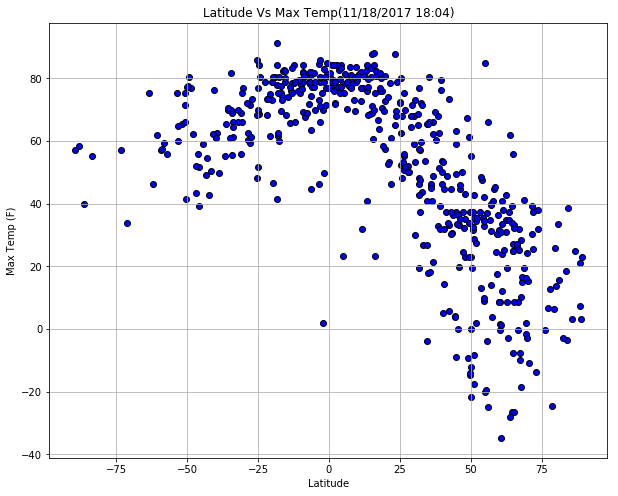

In [9]:
#scatter plots
#Latitude vs Temperature PLot

Lat = weather_clean_df["Lat"].tolist()
temp = weather_clean_df["Max Temp"].tolist()

# enlarging the size of the plot and setting grid lines
plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(x=Lat,y=temp,marker="o",facecolors="blue",edgecolors='black')

plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title(f"Latitude Vs Max Temp({datetime.now().strftime('%m/%d/%Y %H:%M')})")

plt.show()

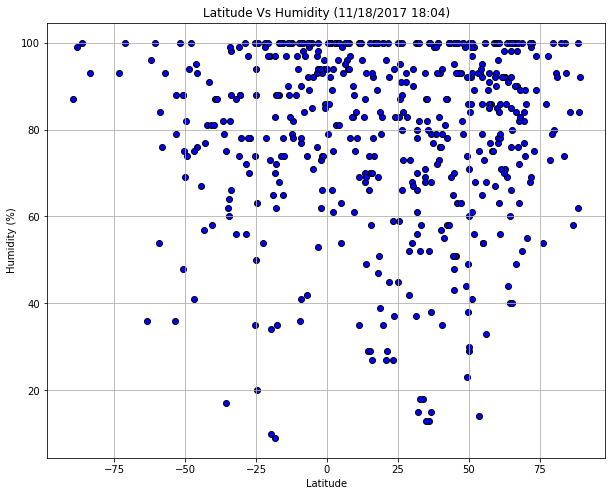

In [10]:
#Latitude Vs Humidity PLot

Lat = weather_clean_df["Lat"].tolist()
hum = weather_clean_df["Humidity"].tolist()

# enlarging the size of the plot and setting grid lines
plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(x=Lat,y=hum,marker="o",facecolors="blue",edgecolors='black')

plt.title(f"Latitude Vs Humidity ({datetime.now().strftime('%m/%d/%Y %H:%M')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.show()

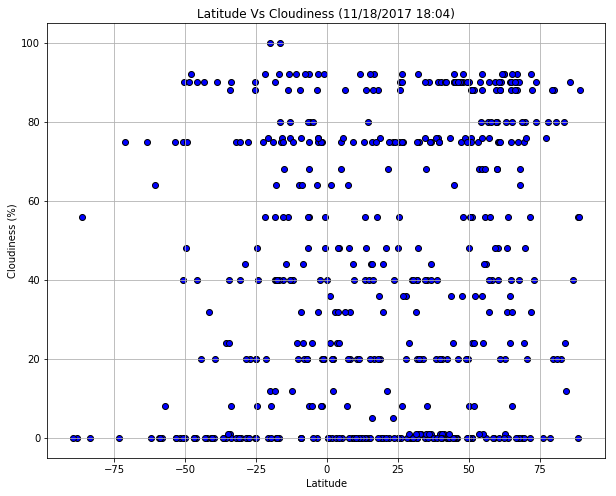

In [11]:
#Latitude Vs Cloudiness Plot

Lat = weather_clean_df["Lat"].tolist()
cloud = weather_clean_df["Cloudiness"].tolist()

# enlarging the size of the plot and setting grid lines
plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(x=Lat,y=cloud,marker="o",facecolors="blue",edgecolors='black')

plt.title(f"Latitude Vs Cloudiness ({datetime.now().strftime('%m/%d/%Y %H:%M')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.show()

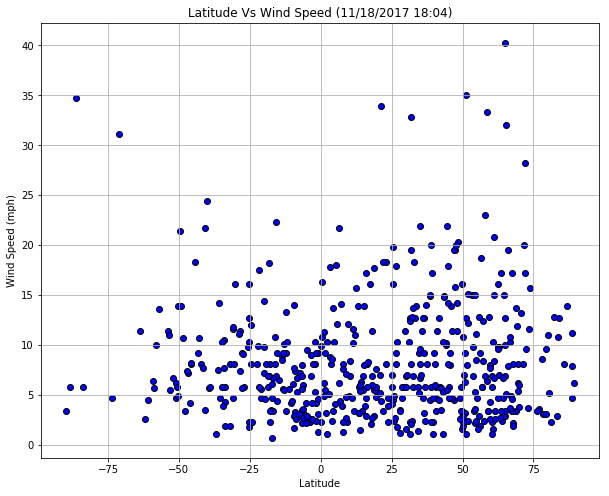

In [12]:
#Latitude vs Wind Speed plot

Lat = weather_clean_df["Lat"].tolist()
wind = weather_clean_df["Wind Speed"].tolist()

# enlarging the size of the plot and setting grid lines
plt.figure(figsize=(10,8))
plt.grid(True)
plt.scatter(x=Lat,y=wind,marker="o",facecolors="blue",edgecolors='black')

plt.title(f"Latitude Vs Wind Speed ({datetime.now().strftime('%m/%d/%Y %H:%M')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.show()